In [1]:
from skimage import exposure, io
from flowdec import data as tfd_data
from flowdec import psf as tfd_psf
from flowdec import restoration as tfd_restoration
from skimage.transform import rescale
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from scipy.ndimage import gaussian_filter
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from pprint import pprint

from FOV import FOV

%matplotlib inline

2024-04-11 00:59:58.904086: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
stack_scaled = io.imread('2024-04-11_00-59-25_input.tif')
output = io.imread('2024-04-11_00-59-21_deconv.tif')

In [15]:
output_2 = gaussian_filter(output.astype(np.float32),1.5)

In [25]:
images_to_plot = [stack_scaled, output , output_2]
titles = ['Original Image', 'Deconvolved Image', 'decon + gauss']
slices = [(750,850), (650,710)]
slices[0]

(750, 850)

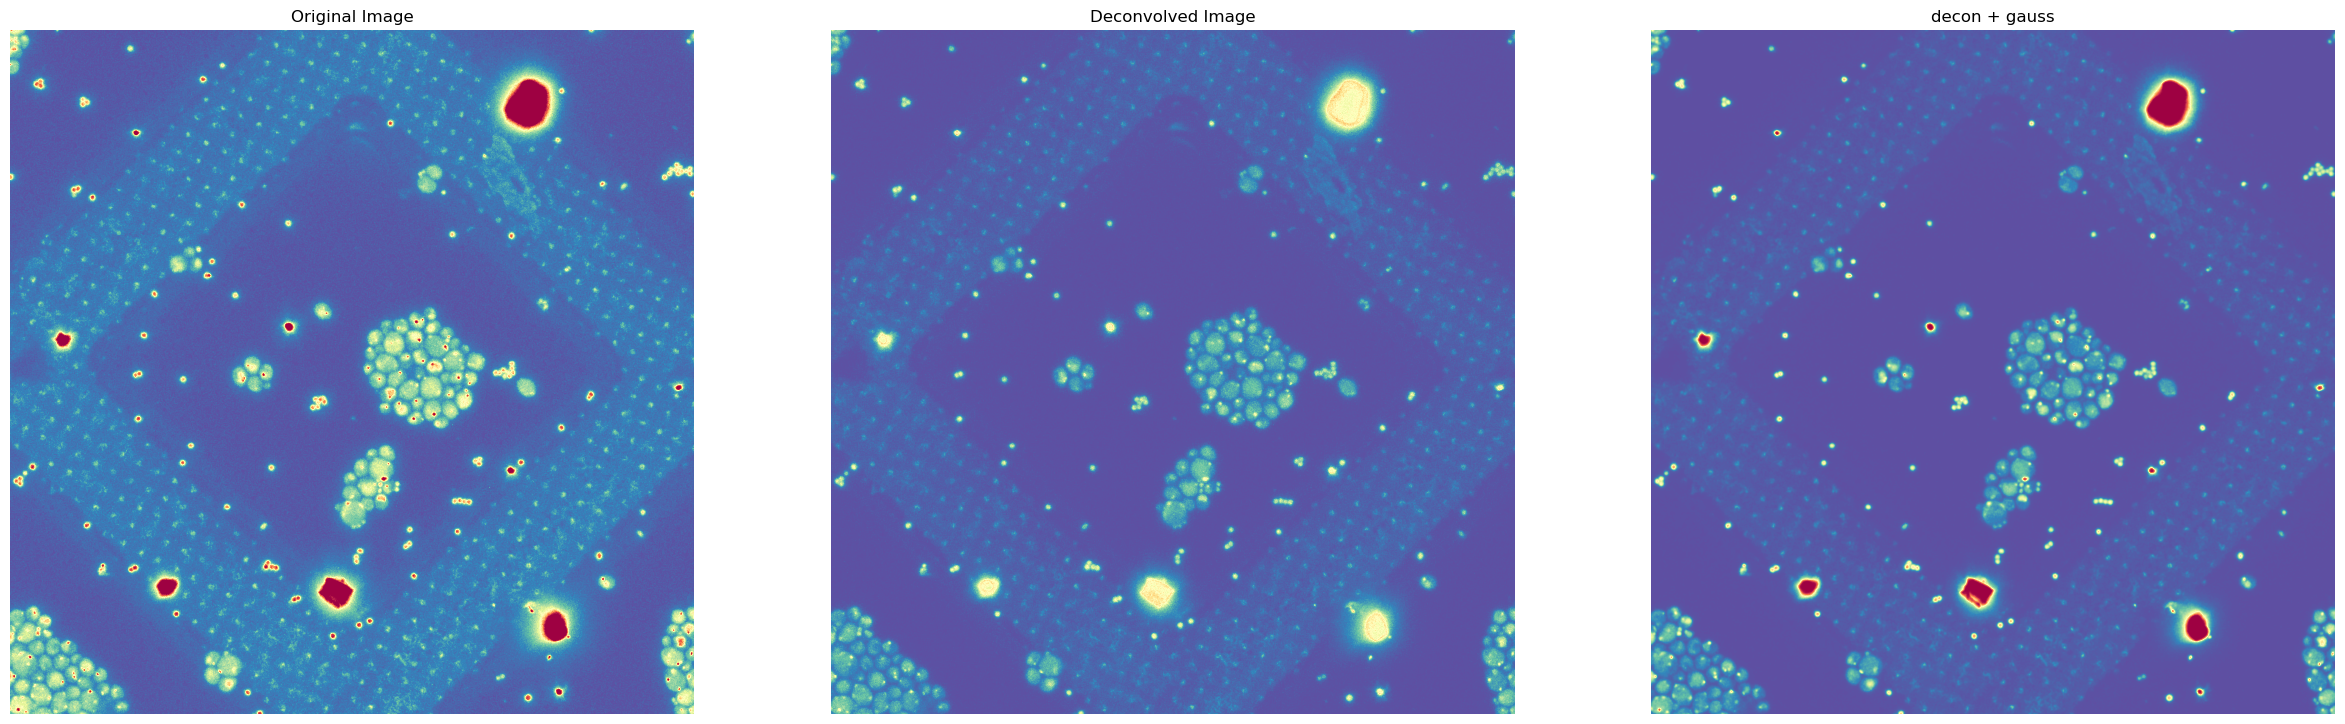

In [26]:
fig, axs = plt.subplots(1, len(images_to_plot))
axs = axs.ravel()
fig.set_size_inches(30, 15)
center = tuple([slice(None), slice(10, -10), slice(10, -10)])

for i, d in enumerate(images_to_plot):#res.data
    img = exposure.adjust_gamma(d[center].max(axis=0), gamma=1)
    axs[i].imshow(img, cmap='Spectral_r')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

(2048, 2048)
(2048, 2048)
(2048, 2048)


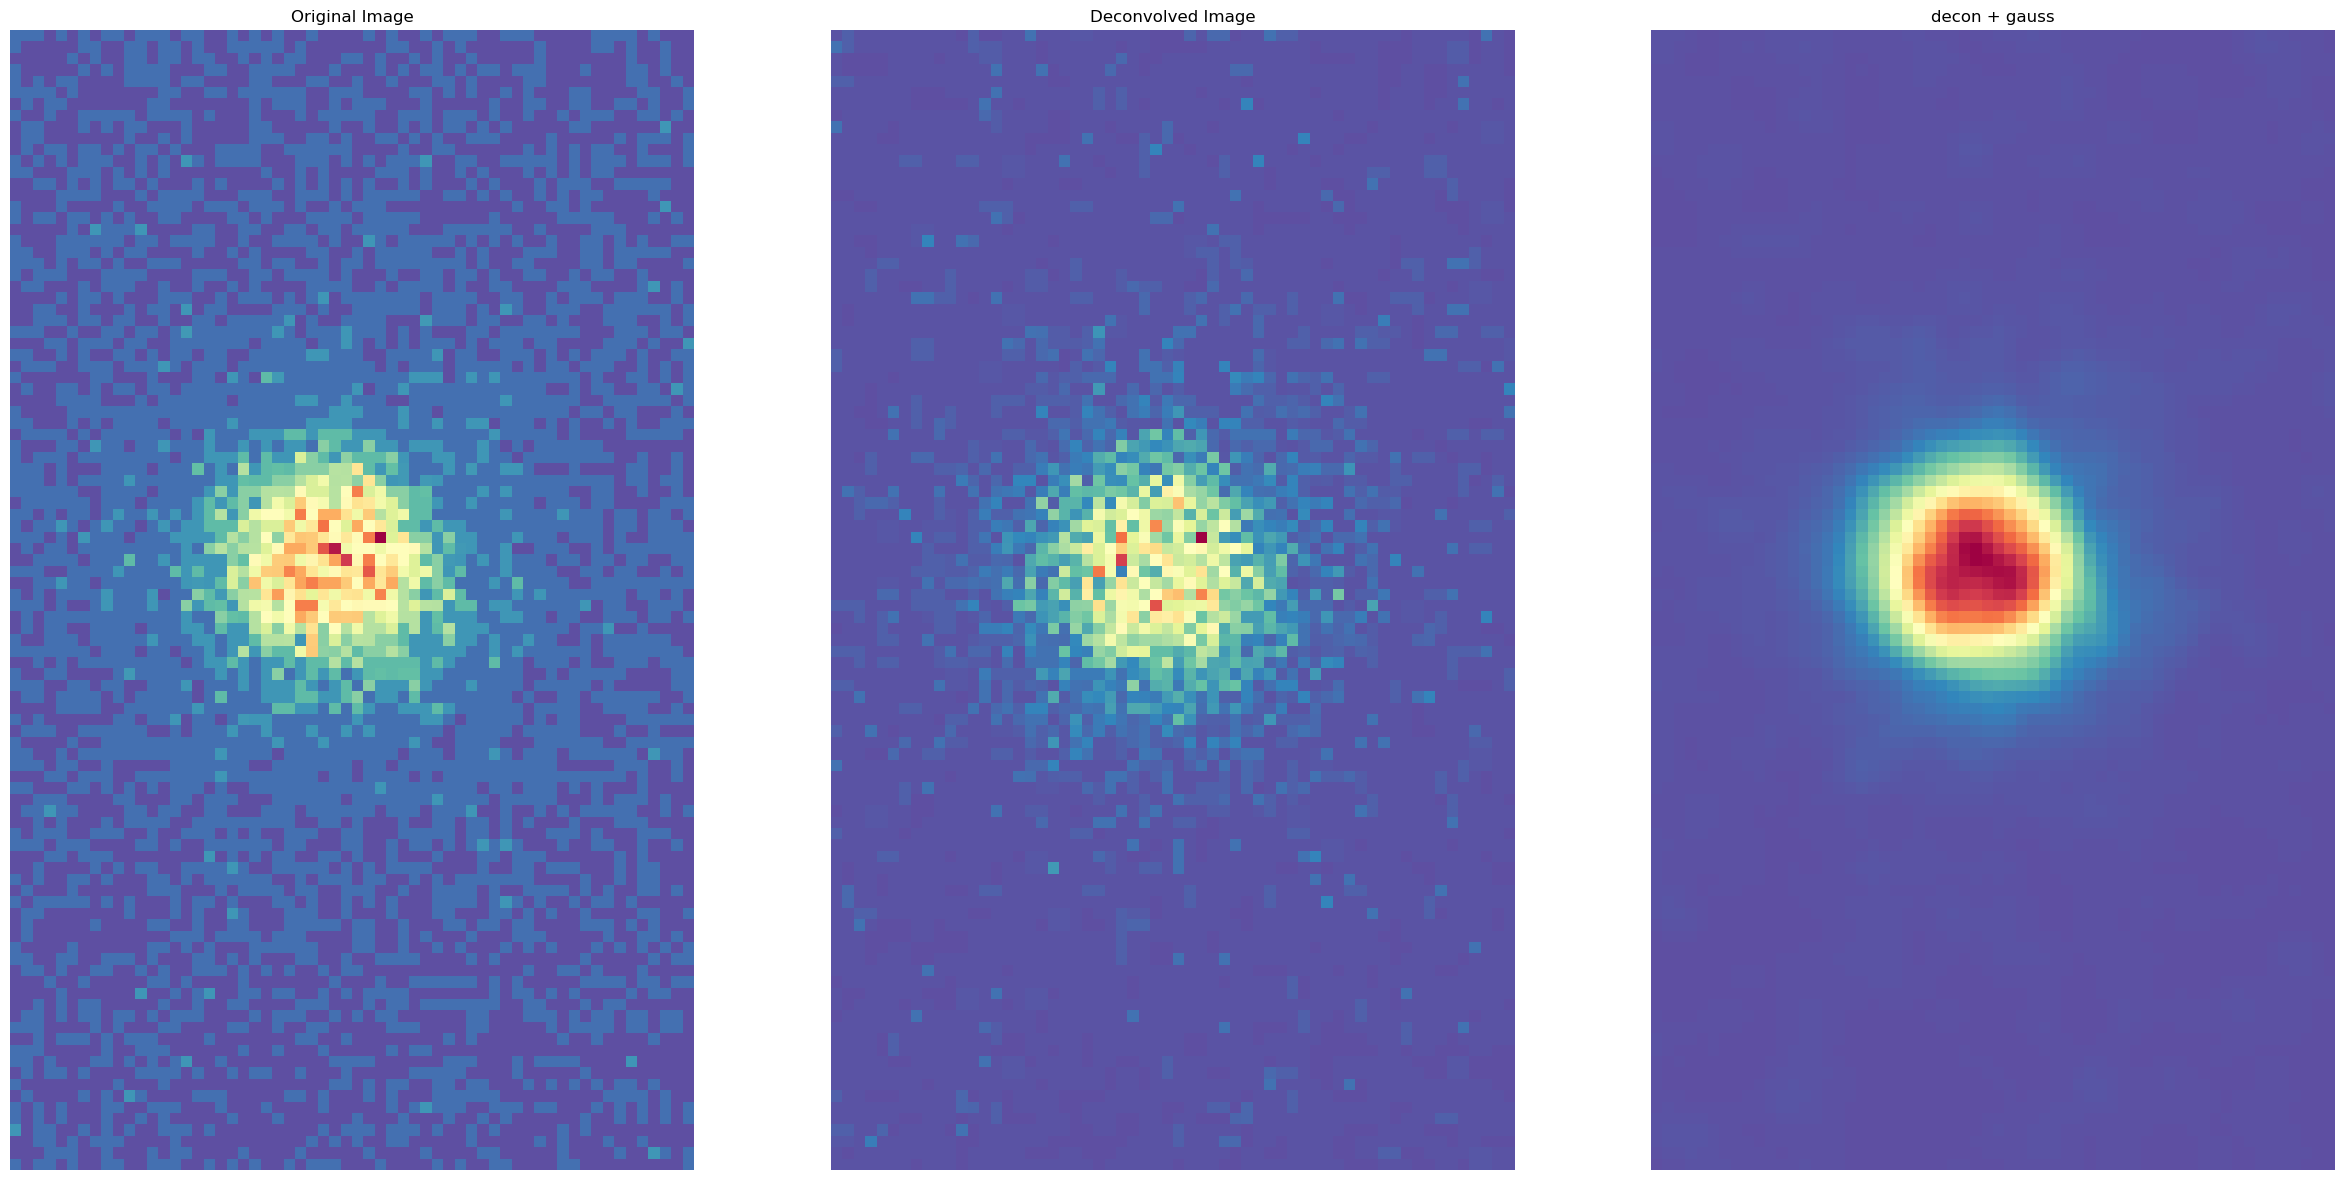

In [27]:
fig, axs = plt.subplots(1, len(images_to_plot))
axs = axs.ravel()
fig.set_size_inches(30, 15)
center = tuple([slice(None), slice(10, -10), slice(10, -10)])

for i, d in enumerate(images_to_plot):#res.data
    img = exposure.adjust_gamma(d.max(axis=0), gamma=1)
    print(img.shape)
    axs[i].imshow(img[slices[0][0]:slices[0][1],slices[1][0]:slices[1][1]], cmap='Spectral_r')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

In [28]:
def xz_project(img):
    return np.max(img, axis=1)

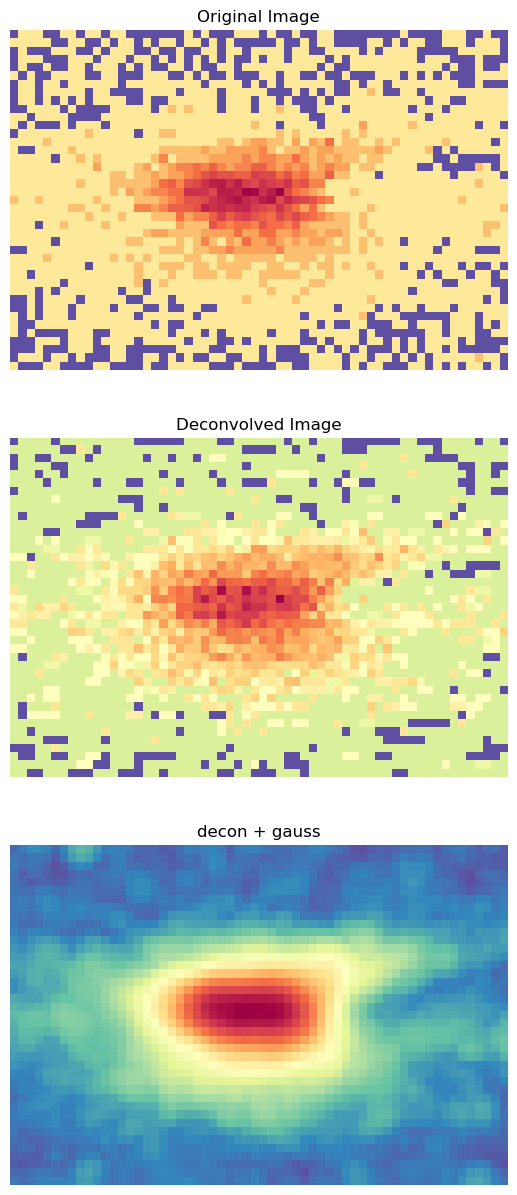

In [29]:
fig, axs = plt.subplots(len(images_to_plot),1)
axs = axs.ravel()
fig.set_size_inches(30, 15)


xz_projection_data = [xz_project(img[:,slices[0][0]:slices[0][1],:]) for img in images_to_plot]

for i, d in enumerate(xz_projection_data):#res.data
    img = exposure.adjust_gamma(d,gamma=.2)
    axs[i].imshow(img[:,slices[1][0]:slices[1][1]], cmap='Spectral_r')
    axs[i].set_title(titles[i])
    axs[i].axis('off')